# Atividade 01 - Parte 01 - Inventário de Emissões utilizando Python

Aluna: Cecília Fonseca

## Abrir planilha de fatores de emissões compilada.
Utilizei o capítulo 11.7 (mudar para o meu) da AP42, pois meu empreendimento é uma cimenteira (mudar para o meu). Link: https://www.epa.gov/sites/default/files/2020-10/documents/c11s07.pdf

In [2]:
# Utilizando Pandas para abrir a planilha

import pandas as pd
import os

# Coletando o caminho que estou
cwd = os.getcwd()

# Pasta dos fatores de emissão
path = cwd + '\\tabelas\\FE'
print(path)

# Indicando nome do arquivo
chapterNumer = 11
subChapter = 7
file = 'chp_'+str(chapterNumer)+'_'+str(subChapter)+'.csv'
print(file)

# Abrindo arquivo utilizando o Pandas
fe = pd.read_csv(path + '\\'+file)
print(fe)


C:\Users\cecil\OneDrive\Documentos\CPA\ENS5173\tabelas\FE
chp_11_7.csv
               Source    PM  Lead   SO2   NOx   CO    CO2   VOC    HF  \
0         Comminution  0.12   NaN   NaN   NaN  NaN    NaN   NaN   NaN   
1               Dryer  2.30   NaN   NaN   NaN  NaN    NaN   NaN   NaN   
2              Cooler  0.11   NaN   NaN   NaN  NaN    NaN   NaN   NaN   
3  Firing-natural gas   NaN   NaN  44.0  0.54  3.3  780.0  0.43  0.46   

   Fluorides  
0        NaN  
1        NaN  
2        NaN  
3       0.56  


2530.0
1
2
3
4
5
6
7
8
9


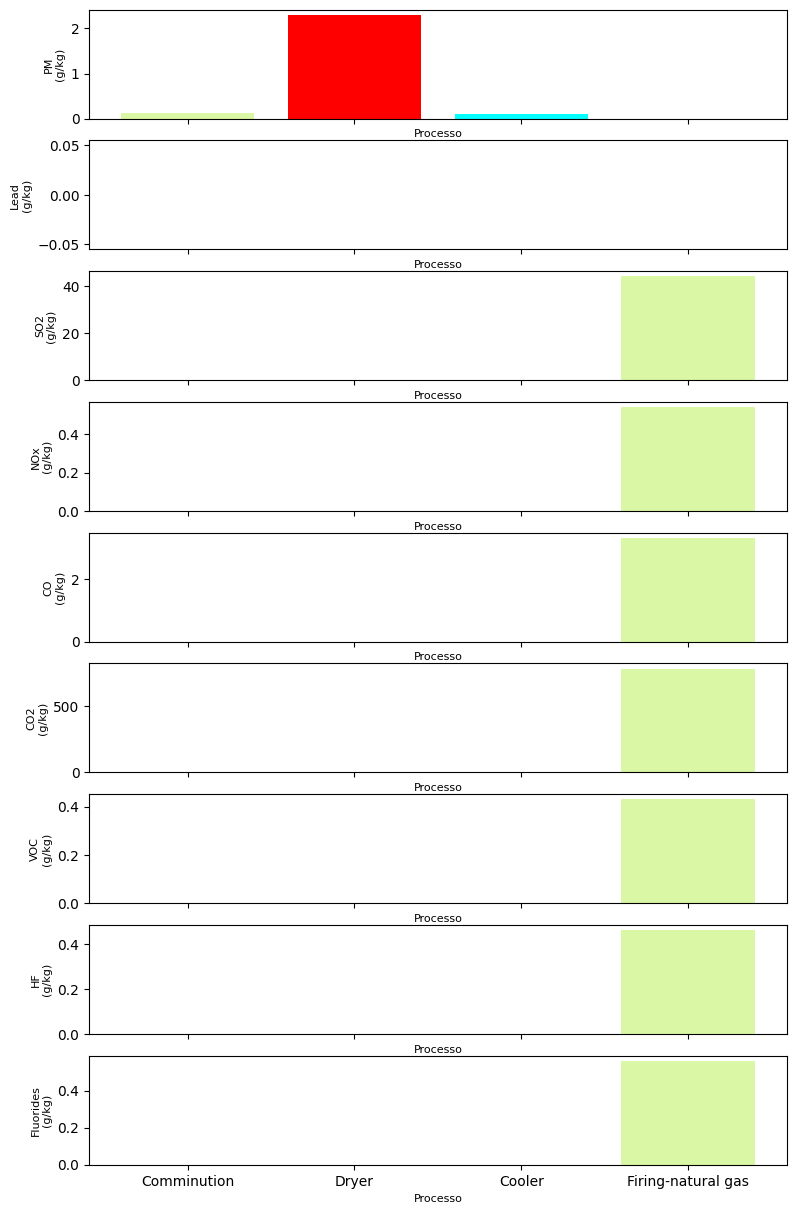

In [10]:
# Plotando os fatores de emissão
import matplotlib.pyplot as plt

atv= 1000 # considerando taxa de atividade
emis = fe['PM']*atv

# Somando dataframe
print(emis.sum())

#Criando a figura com Matplotlib
fig,ax = plt.subplots(len(fe.columns)-1,1, sharex = True, figsize=(9,15))

for ii in range(1,len(fe.columns)):
    print(ii)
    ax[ii-1].bar(fe['Source'],fe.iloc[:,ii],color=['#DAF7A6', 'red' , 'cyan'])
    ax[ii-1].set_xlabel('Processo', fontsize=8)
    ax[ii-1].set_ylabel(fe.columns[ii]+'\n(g/kg)', fontsize=8) # inventei a unidade

# Salva a figura na pasta Figuras
fig.savefig(cwd+'\\Figuras\\barplot_fatorEmiss.png')

## Criando taxa de atividazde aleatória com sazonalidade
Nesta seção iremos criar uma taxa de atividade que contenha sazonalidade ao longo dos meses do ano. Esta variabilidade também deve conter uma componente aleatoria.

[314.10094703 746.00643922 315.8148977  831.02479011 682.30306603
 896.20967453 551.45543452 730.79212457  25.1245987  822.0622772
 170.18539639 220.66059696 594.0333021  988.01140098 220.03301209
 697.60064613 943.240862   402.38260108 891.1914946  629.89128552
 957.60844857 663.98377886 286.03734621 333.70881508 606.88965394
 280.44571551 894.23909707 637.05217027 236.97779308 549.20157285
 541.9325749  161.95369007 459.97779342 381.37147431 179.48751506
 328.18543311 354.16126603 307.76484929 545.58962586 880.61713487
 684.45482226 195.87008353 779.63911087 175.1608422  839.89215156
 742.97785431 905.37217899 109.57075765 506.63227271  96.0644435
 977.9641194  530.36949007 434.39802859 700.70209811 988.86145156
 135.60710487 429.34383653 238.80116247 556.34470833 746.26674687
 302.97975843 710.60910944 717.84462555 896.98468823 488.96259945
 495.97199422 826.75538107 633.24300585 394.32363866 553.94043898
 683.74592944 733.64461604  33.90767502 371.53249663 512.31637494
 522.3896743

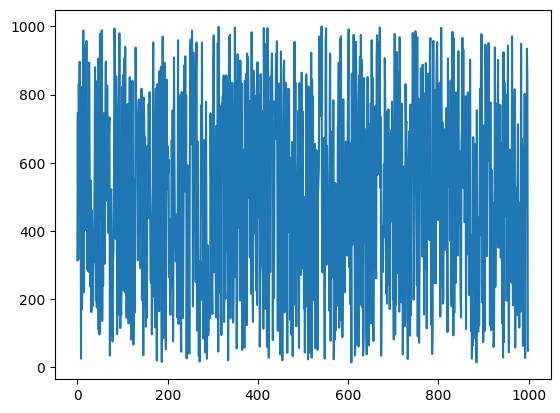

In [12]:
# Criando vetor de valores aleatórios

import numpy as np

atvMax = 1000 #inventando
atvMin = 12
n = 1000
atv = (atvMax - atvMin)* np.random.rand(n) + atvMin
print(atv)

# Criando uma figura com os valores aleatorios

fig, ax=plt.subplots()
ax.plot(atv)

In [ ]:
# criar um vetor com as datas

from datetime import datetime, timedelta
data_inicial = datetime(2024,1,1)
data_final = datetime(2024,12,31)
passo = timedelta(days=1)
vetor_Datas=[]
data_atual = data_inicial
while data_atual <=